## Cluster Distribution

Total clusters: 40
Cluster 0: 181 images
Cluster 1: 1496 images
Cluster 2: 19 images
Cluster 3: 43 images
Cluster 4: 14 images
Cluster 5: 28 images
Cluster 6: 13 images
Cluster 7: 5 images
Cluster 8: 90 images
Cluster 9: 8 images
Cluster 10: 8 images
Cluster 11: 5 images
Cluster 12: 22 images
Cluster 13: 5 images
Cluster 14: 8 images
Cluster 15: 6 images
Cluster 16: 5 images
Cluster 17: 8 images
Cluster 18: 6 images
Cluster 19: 21 images
Cluster 20: 10 images
Cluster 21: 5 images
Cluster 22: 8 images
Cluster 23: 5 images
Cluster 24: 6 images
Cluster 25: 5 images
Cluster 26: 5 images
Cluster 27: 5 images
Cluster 28: 5 images
Cluster 29: 5 images
Cluster 30: 5 images
Cluster 31: 5 images
Cluster 32: 5 images
Cluster 33: 5 images
Cluster 34: 8 images
Cluster 35: 4 images
Cluster 36: 6 images
Cluster 37: 5 images
Cluster 38: 5 images
Cluster 39: 5 images


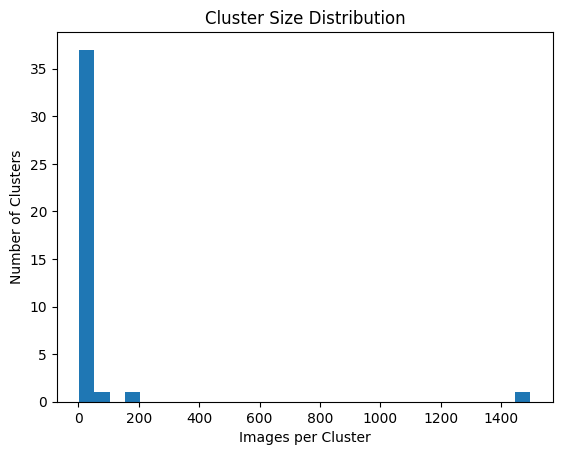

In [33]:
import json
from collections import Counter
import matplotlib.pyplot as plt

img_cluster_file_path = "/home/xiang_fang1/Desktop/meme/icwsm2021-memes-chans/icwsm2021-memes-chans/imgs-diffs.clusters"
clusters = []

with open(img_cluster_file_path, "r") as f:
    for line in f:
        if line.strip():
            clusters.append(json.loads(line))

print(f"Total clusters: {len(clusters)}")
for c in clusters:
    print(f"Cluster {c['cluster_no']}: {len(c['images'])} images")

sizes = [len(c["images"]) for c in clusters]
plt.hist(sizes, bins=30)
plt.xlabel("Images per Cluster")
plt.ylabel("Number of Clusters")
plt.title("Cluster Size Distribution")
plt.show()


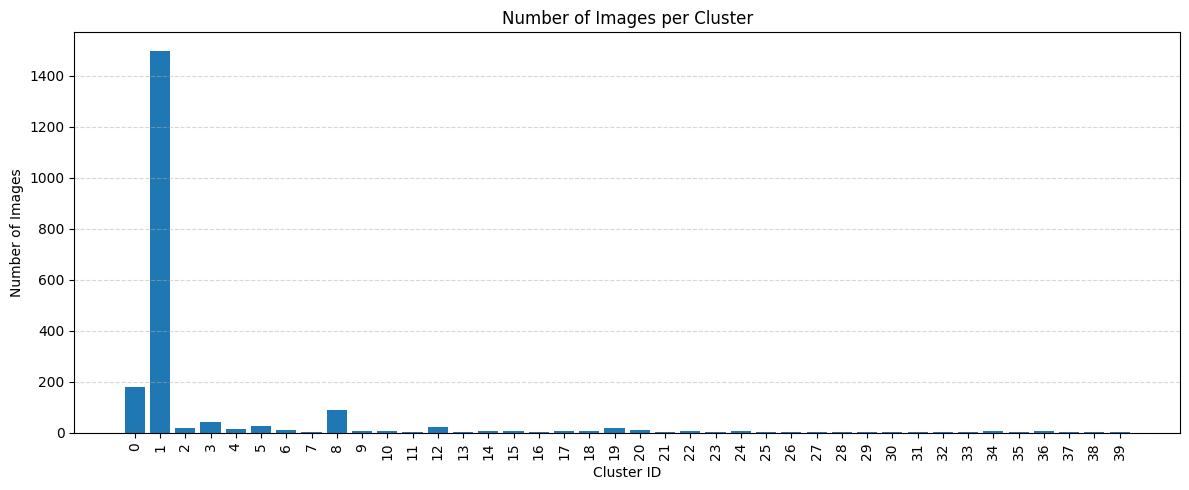

In [28]:
# X: cluster IDs, Y: number of images in each cluster
cluster_ids = [c["cluster_no"] for c in clusters]
cluster_sizes = [len(c["images"]) for c in clusters]

plt.figure(figsize=(12, 5))
plt.bar(cluster_ids, cluster_sizes)

plt.xlabel("Cluster ID")
plt.ylabel("Number of Images")
plt.title("Number of Images per Cluster")
plt.xticks(cluster_ids, rotation=90)  # show all cluster ids if many
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Sample per Cluster

In [32]:
clusters

[{'cluster_no': 0,
  'images': ['fb1079792adfcbefaa14248df880e32f79025939a024f6a7df0c288d76dc99f8',
   'e32b90c271e9439d462fae2b04e131309b1b96628a74c9301e39e0d93f408950',
   '24821be57b2a2a177a4d775aaf913fe2ab6aa39216633f087e479e2b4a953939',
   '08ebed4f1875b4b415ab1f45d0ee7b03e67ba591da478512421d8b60671d2245',
   '44bbc04aab61ccbc5b3e8c8805741e8eacab7a3cc3e2f05aa193be9e22c3f8e8',
   'cfd95038c3da9c5723790836128f9b314a0be8b881d7ad00acd428fc46a04664',
   '50ef788e2b9dd01d999a9949e958daf0e07601e7211f6541dfa284dc472dc8df',
   'dc6dd79fc81a2748dcb7262264ab4e943307aef87124838acb84d3a6ff6149c5',
   '9fc6ed3a614a98190447d9ea8c6a6a0aa9f9c455c7b1db53993276c320bac61f',
   '3ed1597a400965c0f3c145f02e9b082a6addb9df5faed34449bd520da05e5359',
   '724b35b47d3512439f0a7cf1a4752f01558463f71c46663c88d996003c39f71a',
   '719df8c7ba1e50f851d0c8b47b459d867d3de8126f6ef15f0aabcf29ab9b89f4',
   'b30a07853b9e5f9c34339fb2bdcc58f63e6b4842d6dd736ab495362bc2e6777a',
   '842b99dfbc5202c426702b68266f003386c349ab5245

In [34]:
import random

sampled_per_cluster = {
    c["cluster_no"]: random.sample(c["images"], min(5, len(c["images"])))
    for c in clusters
}

for cluster_id, samples in sampled_per_cluster.items():
    medoid_hash = clusters[cluster_id]['medoid_hash']
    if medoid_hash not in samples:
        sampled_per_cluster[cluster_id].append(medoid_hash)

In [35]:
sampled_per_cluster

{0: ['a7dc7d32c03ea3884a37d196dc03e2b5041673e0a1f012080af416968141749c',
  'b30814bbd7bb61efd543a41abeaba750c9f14884931a113621cad5a59e2bb095',
  '009557494a3e6ac29d4fe8859accb2634ff7167b77db6810ed2276693ea8c2c6',
  'e9868a57d1434e263e8e79d1df247c9a0dd20ac2293e5c53ba9dd4d9e1b91a1d',
  '7c34570e23b8050b49cc5e9804fe693f794efdfee01bd105989419d004506a10',
  '24821be57b2a2a177a4d775aaf913fe2ab6aa39216633f087e479e2b4a953939'],
 1: ['750dd2a896144afcca63396d8adeaf5aac648b057c9bfd511ffe5e132c9ac888',
  'dc9ea63d29bf535c4bbb81e693b13e3c78d39adf64e82ba1555135ee1c0c0003',
  'c15fe7ef6362dbcda0e06c9ef1776eb8c9dad2ea17f0eb1c9d3c25d72f92fe1d',
  '494bed52185fca53046a87d15955f8eecf13518e79dfe438453a85caa8f9c081',
  '421770e99afe9e12db91eef1b156d8df41016cfaa0cb51e34a9360a54ce5e76d',
  '1a88420792ab176a5a67ae1e30096b33e577b4041dfb19da06cebad4e3bbe2af'],
 2: ['d30972178e7cf743c2c9280eff6b39e5b4d6f3ade4e75badb30187d7f7c138ab',
  '16a37607a26003bdbf308825b8e4bef4e6ff7cfbc7afd1256d097d863e17015c',
  '897c55

## Sample Imgs

In [9]:
import json
import csv


metadata_hash_path = "/home/xiang_fang1/Desktop/meme/icwsm2021-memes-chans/icwsm2021-memes-chans/metadata_hashes.json"

with open(metadata_hash_path, "r") as f:
    metadata_hash = json.load(f)


In [10]:
metadata_hash.keys()

dict_keys(['md5', 'sha256', 'pHash'])

In [37]:
metadata_hash["sha256"]

{'c528464287d0af3b68bda530b9fbe8c4a5d6cd2e92664dc06ae9b2ba111331a2': {'sha256': 'c528464287d0af3b68bda530b9fbe8c4a5d6cd2e92664dc06ae9b2ba111331a2',
  'md5': '88ba80858f5a6ca5c0cc835a5822055e',
  'pHash': '882d7ced028f1d3e',
  'ftype': 'JPEG image data, JFIF standard 1.02, resolution (DPI), density 72x72, segment length 16, comment: "File written by Adobe Photoshop\\250 4.0", progressive, precision 8, 480x352, frames 3',
  'path': 'output/images/c528464287d0af3b68bda530b9fbe8c4a5d6cd2e92664dc06ae9b2ba111331a2.gz'},
 '9dbf01255af84d1d36ecd48c536dfb5b56b7c30a0eb182cfb3818362637bda10': {'sha256': '9dbf01255af84d1d36ecd48c536dfb5b56b7c30a0eb182cfb3818362637bda10',
  'md5': '948b3da88e4d6befb5b5d18f860a56f7',
  'pHash': 'd0eb1f433426ce3c',
  'ftype': 'JPEG image data, JFIF standard 1.02, resolution (DPI), density 72x72, segment length 16, Exif Standard: [TIFF image data, big-endian, direntries=5, description=Bourdon, Sebastien; The Judgement of Midas; National Trust, Kingston Lacy; http://ww

In [18]:
len(metadata_hash["sha256"])

124052

In [41]:
folder_prefix = "/home/xiang_fang1/Desktop/meme/icwsm2021-memes-images"

with open("sampled_images.csv", "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["sha256_hash", "cluster_id", "image_path", "is_radical", "notes"])

    for cluster_id, sha_list in sampled_per_cluster.items():
        for sha in sha_list:
            path = metadata_hash["sha256"].get(sha, {}).get("path")
            if path: # some sha256 is not found in the data folder
                writer.writerow([sha, cluster_id, f"{folder_prefix}/{path}", "", ""])

## Mannually labeling imgs in CSV

In [50]:
import gzip
from PIL import Image
from IPython.display import display, clear_output
import io
import pandas as pd



Cluster: 39 | SHA256: 659b94c49113d73441c949e7e3cb4ece10fe7719ec747cd39e29e7034500538b
Path: /home/xiang_fang1/Desktop/meme/icwsm2021-memes-images/output/images/659b94c49113d73441c949e7e3cb4ece10fe7719ec747cd39e29e7034500538b.gz


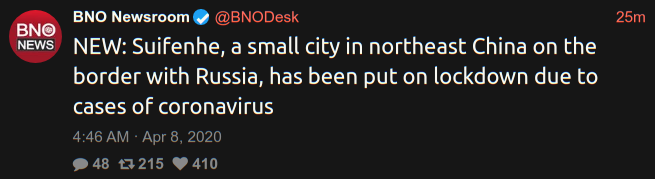

In [51]:
df = pd.read_csv("sampled_images.csv")

# Only label rows without existing label
unlabeled = df[df['is_radical'].isna() | (df['is_radical'] == '')].copy()

# Start labeling
for idx, row in unlabeled.iterrows():
    clear_output(wait=True)

    sha = row["sha256_hash"]
    cid = row["cluster_id"]
    gz_path = row["image_path"]

    print(f"\nCluster: {cid} | SHA256: {sha}")
    print(f"Path: {gz_path}")

    # Open and display gzipped image on-the-fly
    try:
        with gzip.open(gz_path, "rb") as f:
            img = Image.open(io.BytesIO(f.read()))
            display(img)
    except Exception as e:
        print(f"[Failed to load image: {gz_path}]\n{e}")
        continue

    # Input label
    label = input("Label as [r]adical / [n]on-radical / [s]kip: ").strip().lower()

    if label == 'r':
        df.loc[idx, "is_radical"] = "radical"
    elif label == 'n':
        df.loc[idx, "is_radical"] = "non-radical"
    elif label == 's':
        continue
    else:
        print("Invalid input. Skipped.")
        continue

    # Optional notes
    # note = input("Notes (ENTER to skip): ").strip()
    # df.loc[idx, "notes"] = note

    # Save progress
    df.to_csv("sampled_images_labeled.csv", index=False)


In [56]:
def plot_radical_nonradical_images_grid(csv_path, n_rows=3, n_cols=5, figsize=(15, 9), radical=True):
    """
    Plots a grid of images labeled as 'radical' in the CSV.
    Supports .gz-compressed JPEG files.
    
    Args:
        csv_path (str): Path to the labeled CSV.
        n_rows (int): Number of rows in the grid.
        n_cols (int): Number of columns in the grid.
        figsize (tuple): Size of the figure.
    """
    df = pd.read_csv(csv_path)
    if radical:
        df_selected = df[df["is_radical"] == "radical"]
    else:
        df_selected = df[df["is_radical"] == "non-radical"]

    images = df_selected["image_path"].tolist()[:n_rows * n_cols]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, img_path in enumerate(images):
        ax = axes[i]
        try:
            with gzip.open(img_path, 'rb') as f:
                img = Image.open(io.BytesIO(f.read()))
                ax.imshow(img)
                ax.set_title(f"#{i+1}")
        except Exception as e:
            ax.text(0.5, 0.5, "Error", ha='center', va='center')
            print(f"Failed to load {img_path}: {e}")
        ax.axis("off")

    # Turn off extra axes if any
    for i in range(len(images), len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

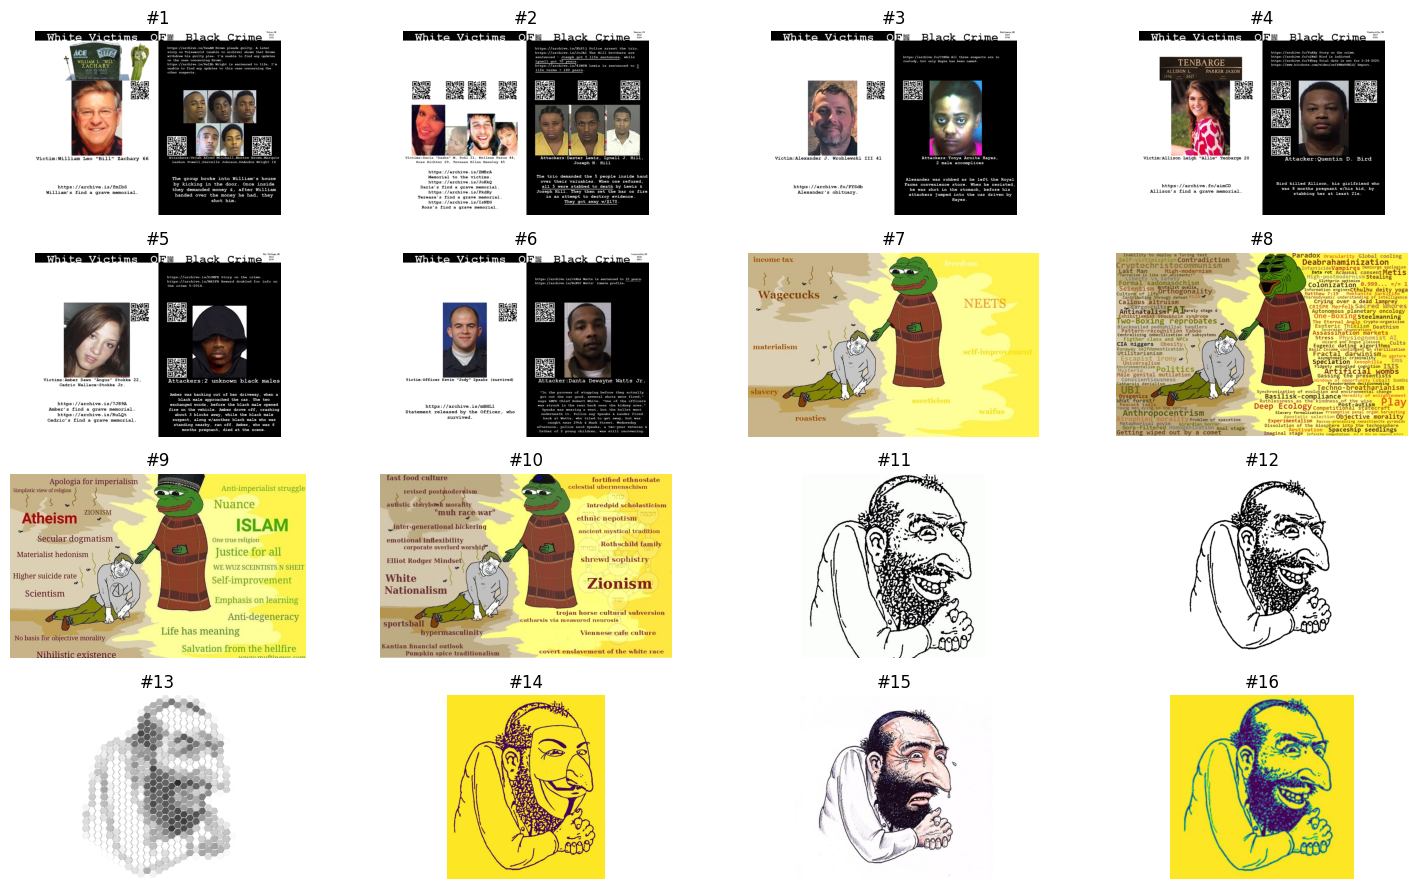

In [57]:
plot_radical_nonradical_images_grid("sampled_images_labeled.csv", n_rows=4, n_cols=4)

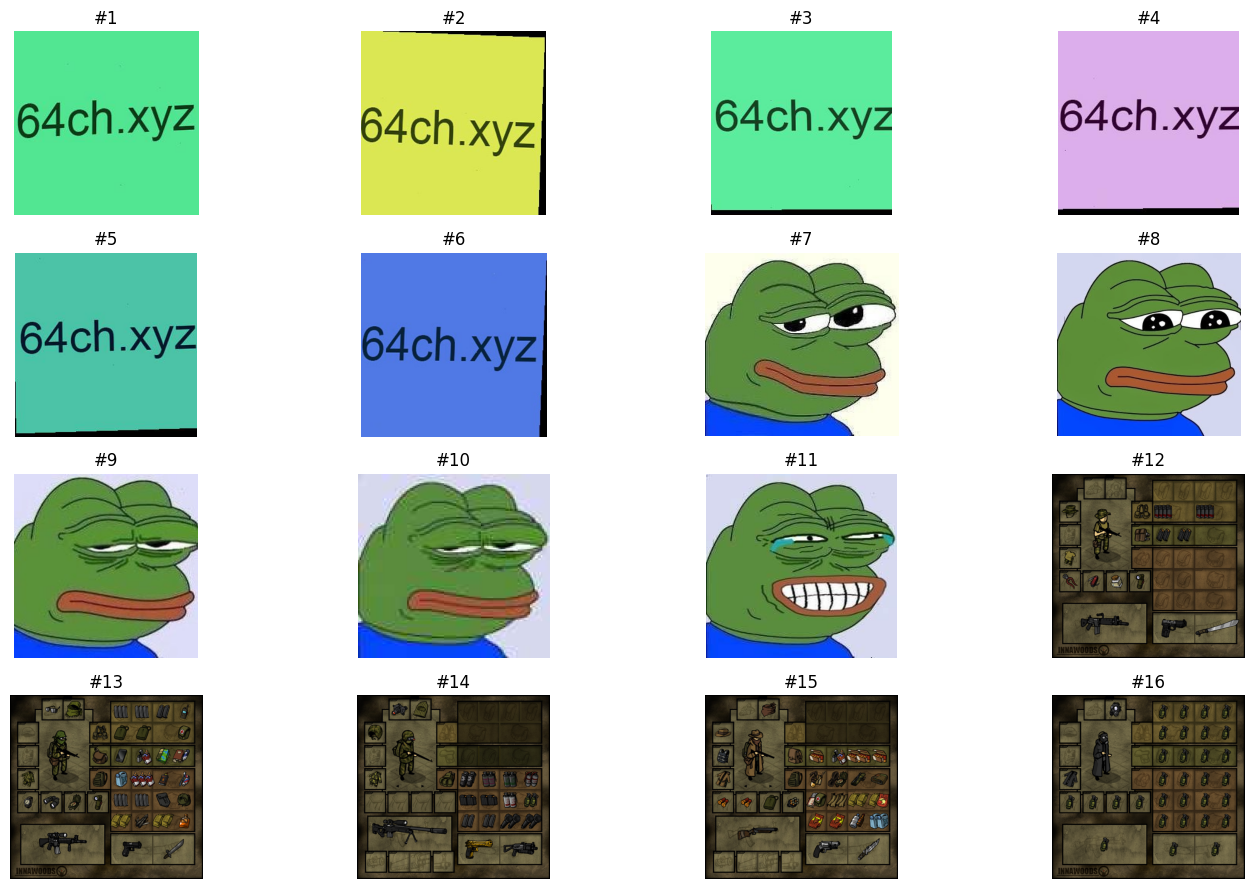

In [59]:
plot_radical_nonradical_images_grid("sampled_images_labeled.csv", n_rows=4, n_cols=4, radical=False)

In [100]:
import base64
from IPython.display import display, HTML


def show_radical_imgs(csv_path):
    df = pd.read_csv(csv_path)
    df_selected = df[df["is_radical"] == "radical"]

    for i, row in df_selected.iterrows():
        img_path = row["image_path"]
        sha_id = row["sha256_hash"] if "sha256_hash" in row else img_path  # fallback to path if hash missing

        try:
            with gzip.open(img_path, 'rb') as f:
                img = Image.open(io.BytesIO(f.read())).convert("RGB")
                buffer = io.BytesIO()
                img.thumbnail((300, 300))
                img.save(buffer, format="JPEG")
                img_base64 = base64.b64encode(buffer.getvalue()).decode()

                html = f"""
                <div style='margin-bottom: 20px;'>
                    <strong>SHA256 ID:</strong> {sha_id}<br>
                    <img src="data:image/jpeg;base64,{img_base64}" style="border:1px solid #ccc; margin-top:5px;">
                </div>
                """
                display(HTML(html))

        except Exception as e:
            print(f"[Error loading {img_path}]\n{e}")


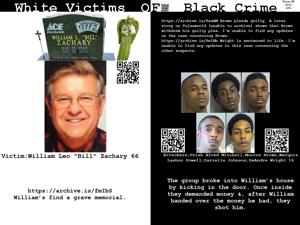


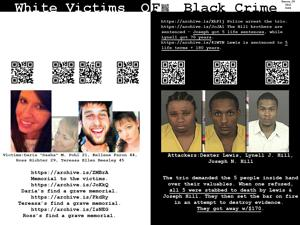


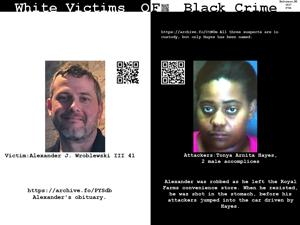


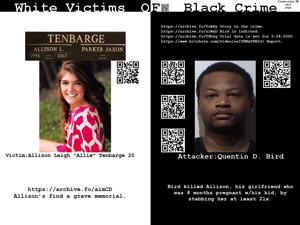


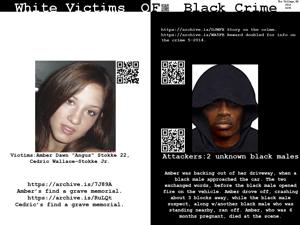


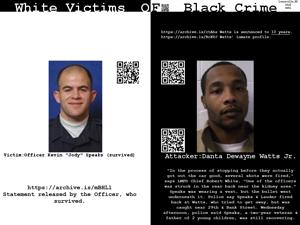


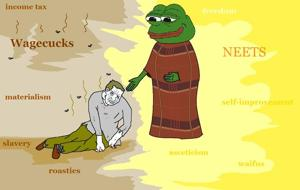


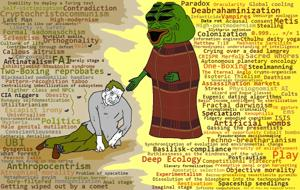


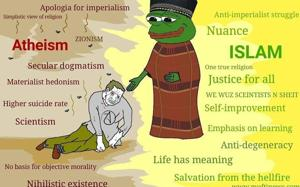


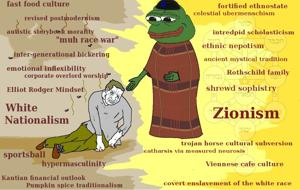


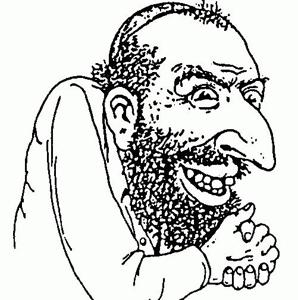


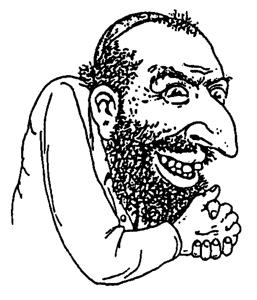


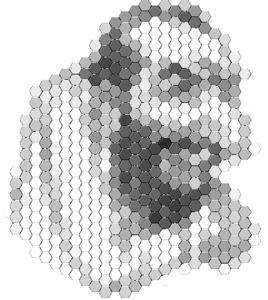


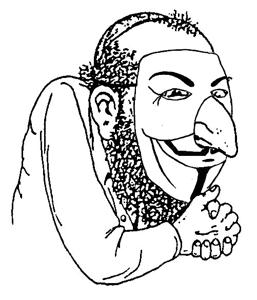


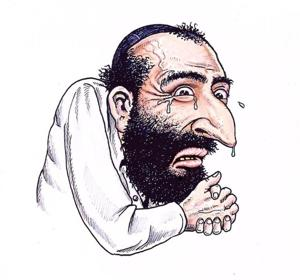


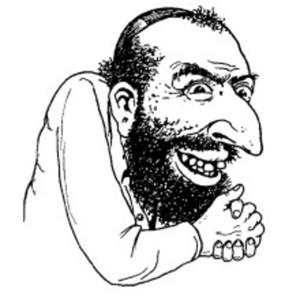


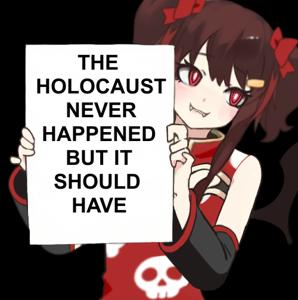


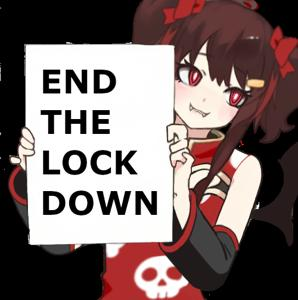


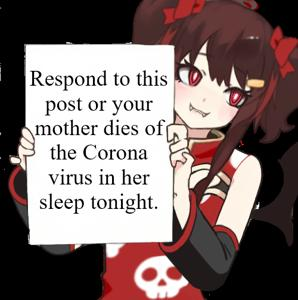


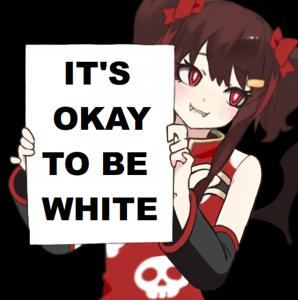


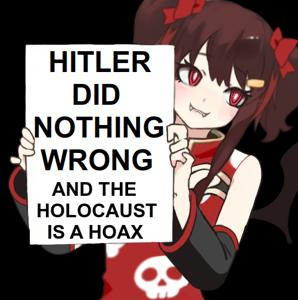


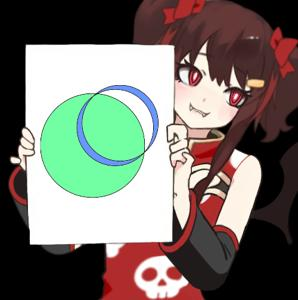


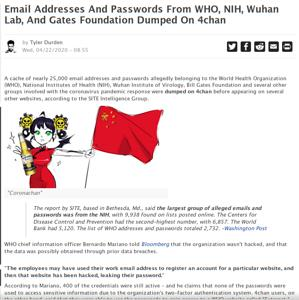


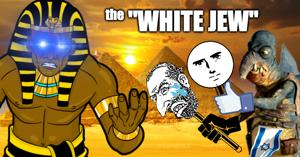


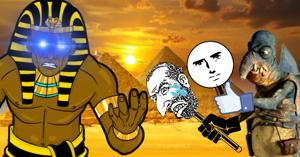


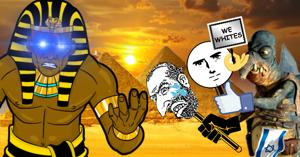


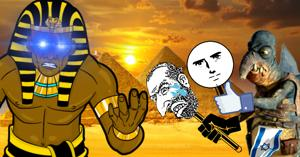


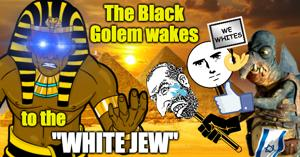


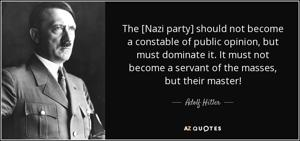


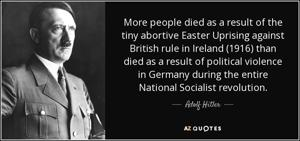


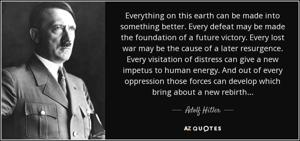


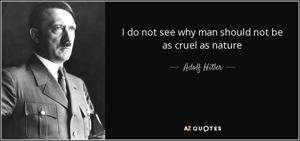


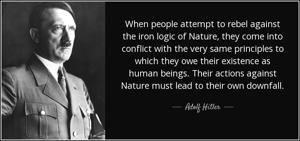


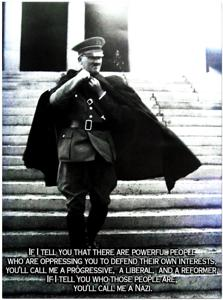


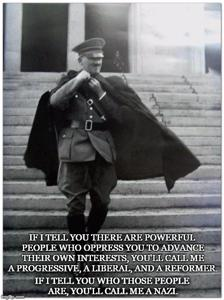


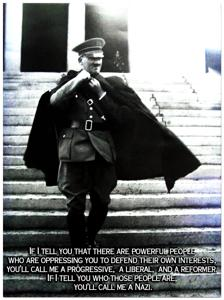


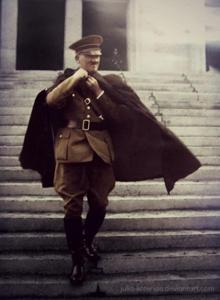

In [101]:
show_radical_imgs("sampled_images_labeled.csv")

## Semi-Supervised Learning

In [ ]:
metadata_hash["sha256"]

In [82]:
img_sha_list = list(metadata_hash["sha256"].keys())
df_manually_labeld = pd.read_csv("sampled_images_labeled.csv")
img_sha_list_labeled = list(df_manually_labeld['sha256_hash'])

filter_img_sha_list = [sha for sha in img_sha_list if sha not in img_sha_list_labeled]

In [88]:
filter_img_sha_list

['c528464287d0af3b68bda530b9fbe8c4a5d6cd2e92664dc06ae9b2ba111331a2',
 '9dbf01255af84d1d36ecd48c536dfb5b56b7c30a0eb182cfb3818362637bda10',
 '535e21e532f18e715612253c764cffd6494f2779d8f003181acffbc0577f599a',
 'ea1cbbb65081cad2c65b83c3443f5a7c3924228768d6b6794b3cc84f9241c79a',
 '02888c770a08b8340f366f64118f5fbdc4b7217c111e6af392033539f5989e43',
 '1f8cc3b3be1f63687d0de50b904919939bed8f7065b6389edaa12a48ea88c23a',
 'b01d9d72a611fb2ef68376db722adc63197bfead00b7a472c5a7c4cd98c391bb',
 '292dee6ba477d87d40bd3d5a10322bfff3d81695893b1971f30e41ca1ac5f080',
 '83990bbb6bcff6b47da175fb4b294b27152ff1203d7226b0dc4f81c3f3a9d6a5',
 'a4d27844ef31d41e91a05a02f330ee4690766d3ebc7aaeffa22e0ea5bafa607d',
 '23e3359c97003a3dabb493c2e9986a31477be95712d65200bce956e925d62fe8',
 'bddea791fdb7026d260cc389e54d09d8d783e3a6992cb2cd281cac9c91edf654',
 '8996a32c9ec1228544232119318facccfd04b84def0f815363c286db2f922ac9',
 '39b4c84700fefa1d7b1529c7030931f53abea6c49b5e17b57200a9f993e12298',
 '95e2d5e650bcba37d0fd1c45db237b5a

In [92]:
import random

folder_prefix = "/home/xiang_fang1/Desktop/meme/icwsm2021-memes-images/output/images"


img_sha_list_2000 = random.sample(filter_img_sha_list, 2000)
df_2000 =pd.DataFrame({'sha256_hash':img_sha_list_2000, 
                       "img_path":[f'{folder_prefix}/{sha}.gz' for sha in img_sha_list_2000],
                       "is_radical":["" for _ in img_sha_list_2000]
                       })

In [93]:
df_2000

sha256_hash  \
0     24feb5b4dda73c10120f02c6d2b8963e6a8b6caf8a3879...   
1     8999608c4d4dcd404290e6e4befb76ff36a0dcef082277...   
2     641b531d679f82b470fd4d301d6467c85a047ab581bd06...   
3     a6d31184a3347112a1360a5d0dfab0dcc347481681720d...   
4     09d6da1e7c6de41a8f0ac3de0ce0dc8221695f3312ea41...   
...                                                 ...   
1995  8ae627a34d8ad70e2f79742dcac31ba9e7268905ba2bd9...   
1996  d18c5e92f4fa2ac2ebde61676ea634725f6b978c58a496...   
1997  f04484247da1194fb480b6d788e8daf284312690cc3ed7...   
1998  6a7c46277e097f84a6f022853c8ed0a6865818be9db96a...   
1999  670b0ddf9f0e315e4eeedc4e4c28873104c9ebc08a0287...   

                                               img_path is_radical  
0     /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
1     /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
2     /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
3     /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
4     /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
...                                                 ...        ...  
1995  /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
1996  /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
1997  /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
1998  /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             
1999  /home/xiang_fang1/Desktop/meme/icwsm2021-memes...             

[2000 rows x 3 columns]

In [94]:
df_2000.to_csv("unlabeled_2000.csv", index=False)

In [102]:
selected_fewshot_radical_images_hashes = ['421770e99afe9e12db91eef1b156d8df41016cfaa0cb51e34a9360a54ce5e76d',
                                          '629439035092ebd8f2afa77d243031ec0af9664e78b0a4afc3db65acbc83a3b8',
                                          '44d51e2b1d38bd59b0fdbc9da4790748afd2a7783ec13689df6eb7802170aeef',
                                          '5b205ffd9969785bc9e1a149c7473023154db5b080797b116c89fc8dc4d5502f',
                                          '68adca644b9a2b0329f40c35333610e2f9a0922dbf8f55b5165768d8173c86d2']
selected_fewshot_radical_images_df = pd.DataFrame({"sha256_hash":selected_fewshot_radical_images_hashes,
                                                   "image_path":[f'{folder_prefix}/{sha}.gz' for sha in selected_fewshot_radical_images_hashes],
                                                   "is_radical": ["radical" for sha in selected_fewshot_radical_images_hashes]})
selected_fewshot_radical_images_df.to_csv("few_shot_examples.csv", index=False)

In [113]:
import gzip
import io
import base64
from PIL import Image
import pandas as pd
import ollama
import os


def load_image_base64(gz_path):
    try:
        with gzip.open(gz_path, "rb") as f:
            img = Image.open(io.BytesIO(f.read())).convert("RGB")
            buffer = io.BytesIO()
            img.save(buffer, format="JPEG")
            return base64.b64encode(buffer.getvalue()).decode()
    except Exception as e:
        print(f"[Image error: {gz_path}]\n{e}")
        return None

def classify_with_explanation(few_shot_df, target_path, model="bakllava"):
    prompt = (
        "You are a vision-language model trained to detect radical content in memes.\n"
        "You will be shown 6 images:\n"
        "- The first 5 are labeled (either 'radical' or 'non-radical')\n"
        "- The 6th is unlabeled\n\n"
        "Your task:\n"
        "1. Predict whether the 6th image is radical or not\n"
        "2. Provide a short explanation for your prediction\n\n"
        "Labeled examples:\n"
    )

    image_list = []

    for i, row in enumerate(few_shot_df.itertuples(), 1):
        img_b64 = load_image_base64(row.image_path)
        if img_b64:
            image_list.append(img_b64)
            prompt += f"Image {i}: {row.is_radical}\n"

    # Add target image
    img_b64 = load_image_base64(target_path)
    if img_b64:
        image_list.append(img_b64)
        prompt += "\nImage 6: Please classify this image."

    else:
        print("Failed to load target image.")
        return None

    # Send to Ollama
    response = ollama.generate(
        model=model,
        prompt=prompt,
        images=image_list,
        stream=False
    )

    return response['response'].strip()


In [114]:
def show_random_gz_image(folder_path, ext=".gz"):
    # List all matching files
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(ext)]
    
    if not all_files:
        print("No .jpg.gz files found.")
        return None

    # Randomly select
    chosen_file = random.choice(all_files)
    print(f"Selected file: {chosen_file}")

    try:
        with gzip.open(chosen_file, 'rb') as f:
            img = Image.open(io.BytesIO(f.read())).convert("RGB")
            display(img)
    except Exception as e:
        print(f"Failed to load image: {chosen_file}\n{e}")
        return None

    return chosen_file

Selected file: /home/xiang_fang1/Desktop/meme/icwsm2021-memes-images/output/images/a29606c5df26eb8ad297cca9258c6206ecbf4c54a443cfab7d7871109a7d9821.gz


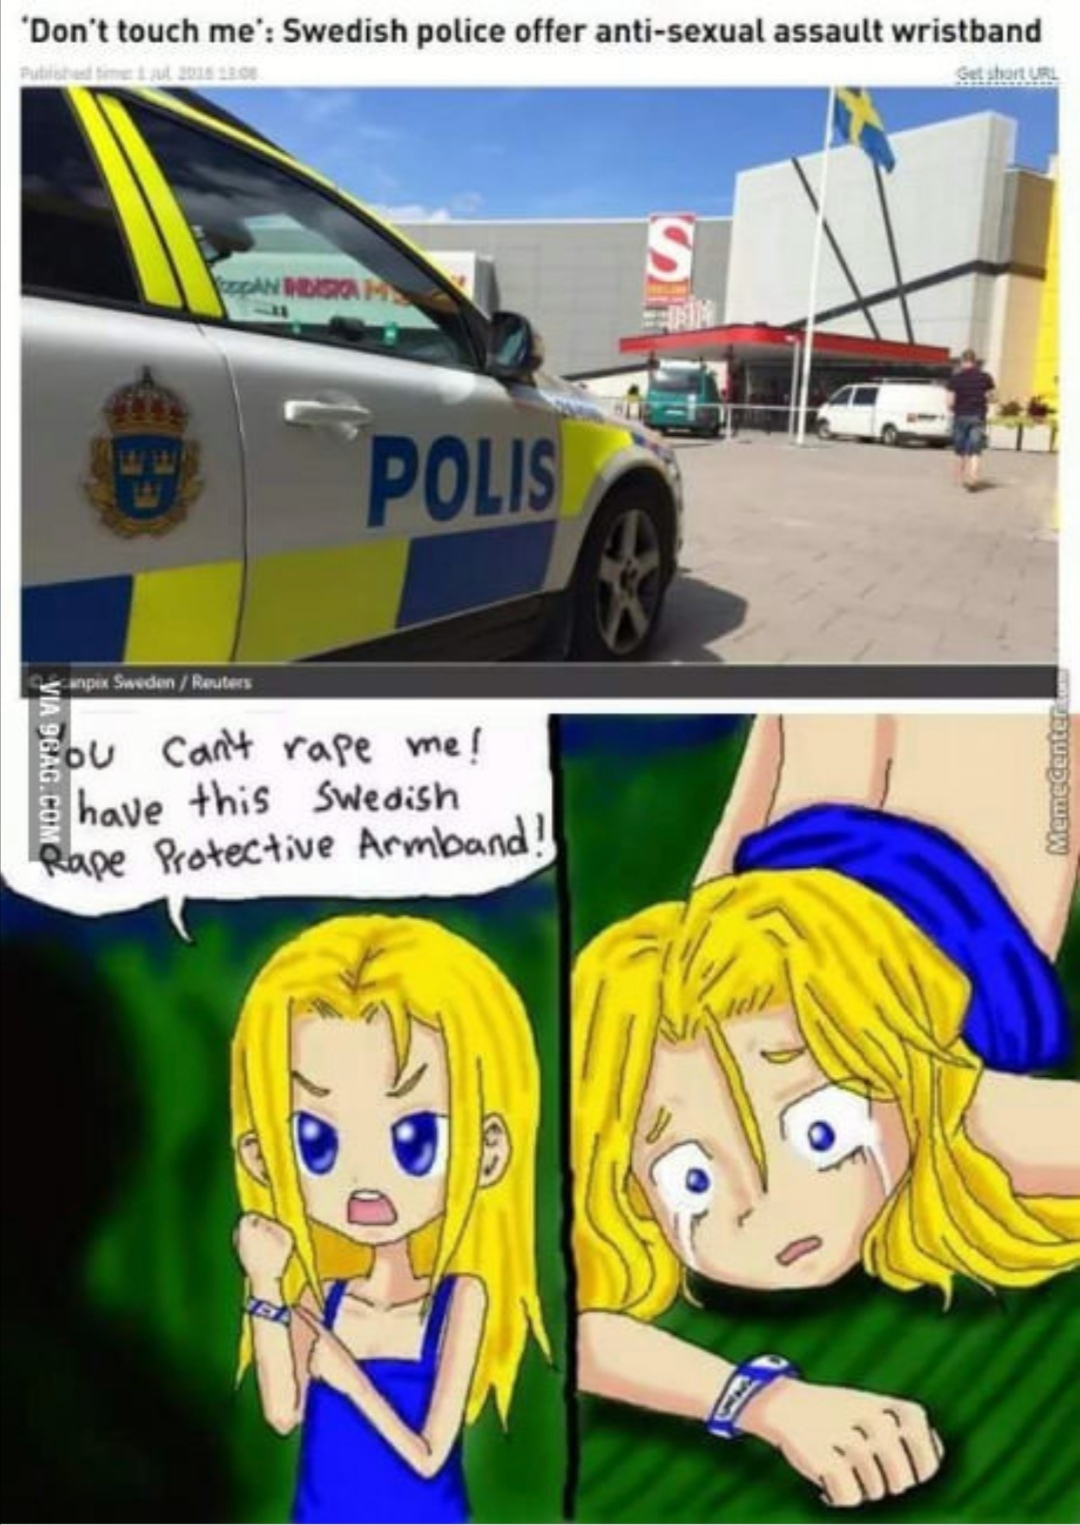

'/home/xiang_fang1/Desktop/meme/icwsm2021-memes-images/output/images/a29606c5df26eb8ad297cca9258c6206ecbf4c54a443cfab7d7871109a7d9821.gz'

In [108]:
show_random_gz_image(folder_prefix)

In [119]:
import os
os.environ.pop("CUDA_VISIBLE_DEVICES", None)

In [118]:
import torch
print(torch.cuda.is_available())

False


/home/xiang_fang1/meme/lib/python3.12/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [117]:
import requests

try:
    res = requests.get("http://localhost:11434")
    print("✅ Ollama server is running.")
except requests.exceptions.ConnectionError:
    print("❌ Ollama server is not running.")

✅ Ollama server is running.


In [115]:
few_shot_df = pd.read_csv("few_shot_examples.csv")
target_img_path = f"{folder_prefix}/a29606c5df26eb8ad297cca9258c6206ecbf4c54a443cfab7d7871109a7d9821.gz"

result = classify_with_explanation(few_shot_df, target_img_path)
print(result)

KeyboardInterrupt: 